# K-means

K-means es un algoritmo de clustering utilizado para agrupar un conjunto de datos en k clusters. El objetivo es minimizar la variabilidad dentro de cada cluster.

## Conceptos Clave

- **Centroides**: Puntos que representan el centro de cada cluster. Inicialmente, los centroides se eligen aleatoriamente.
- **Asignación de Clusters**: Cada punto de datos se asigna al cluster cuyo centroide esté más cercano.
- **Actualización de Centroides**: Después de asignar todos los puntos de datos, los centroides se recalculan como la media de todos los puntos de datos en el cluster.

## Construcción de K-means

1. **Inicialización**: Seleccionar k centroides iniciales, que pueden ser elegidos aleatoriamente o mediante algún otro método de inicialización como k-means++.
2. **Asignación de Clusters**: Asignar cada punto de datos al centroide más cercano.
3. **Actualización de Centroides**: Calcular la nueva posición de cada centroide como la media de los puntos asignados a ese cluster.
4. **Iteración**: Repetir los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.

### Suposiciones y Consideraciones

- **Número de Clusters (k)**: Debe especificarse de antemano el número de clusters. La selección adecuada de k es crucial para el rendimiento del algoritmo.
- **Escalado de Características**: Es importante normalizar o estandarizar los datos, ya que K-means es sensible a la escala de las características.
- **Formas de los Clusters**: K-means asume que los clusters tienen forma esférica y aproximadamente el mismo tamaño.

### Ventajas y Desventajas

- **Ventajas**:
  - Fácil de implementar y comprender.
  - Eficiente en términos de tiempo de computación.
  - Funciona bien con grandes conjuntos de datos.
  - Rápido para actualizar cuando se añaden nuevos datos.

- **Desventajas**:
  - El número de clusters k debe ser especificado de antemano.
  - Sensible a la inicialización de los centroides.
  - Puede converger a un óptimo local.
  - No funciona bien con clusters de formas no esféricas o de tamaños muy diferentes.
  - No es adecuado para datos categóricos.

### Métricas de Evaluación para K-means

| Métrica                    | Qué Mide                                                                 | Interpretación                                   | Cuándo Usarla                                             | Cuándo No Usarla                                           |
|----------------------------|--------------------------------------------------------------------------|--------------------------------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| Inertia (Suma de Cuadrados Intra-cluster) | La suma de las distancias cuadradas desde cada punto hasta su centroide más cercano | Valor más bajo es mejor                          | Evaluar la compacidad de los clusters                     | Cuando se prefiere una métrica basada en la separación entre clusters |
| Silhouette Score           | Mide la separación entre los clusters y la cohesión dentro de los clusters | Valor entre -1 y 1, donde 1 es perfecto          | Evaluar la calidad de los clusters                        | Cuando hay solapamiento significativo entre los clusters    |
| Davies-Bouldin Index       | Promedio de la relación de la dispersión intra-cluster con la separación inter-cluster | Valor más bajo es mejor                          | Evaluar la separación y la compacidad de los clusters     | Cuando los clusters tienen formas no esféricas              |
| Calinski-Harabasz Index    | Ratio de la suma de la dispersión entre-cluster y la dispersión intra-cluster | Valor más alto es mejor                          | Evaluar la separación y la compacidad de los clusters     | Cuando se buscan clusters de tamaños significativamente diferentes |
| Dunn Index                 | Ratio entre la mínima distancia entre puntos de clusters diferentes y la máxima distancia intra-cluster | Valor más alto es mejor                          | Evaluar la compactación y separación de los clusters      | Cuando hay un número elevado de clusters                    |


----

# Ejercicio práctico

In [5]:
import pandas as pd

df = pd.read_csv('/Users/lunaflorestorres/Desktop/Machine Learning/housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

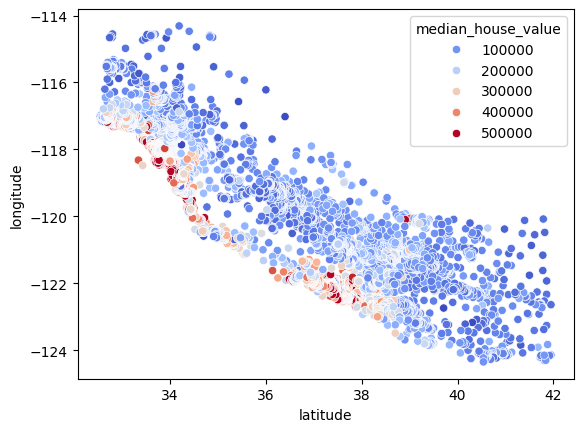

In [9]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= df, hue='median_house_value', palette='coolwarm')

TypeError: cannot convert the series to <class 'float'>

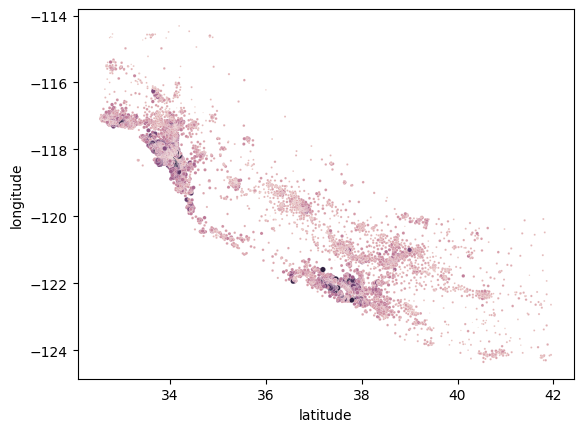

In [10]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= df, hue='median_income',
               s=df['median_income'])

Vemos que los que ganan menos están muy distribuidos por toda California, pero los que ganan más están más concentrados en el Norte y en el Sur, siempre cerca del mar. Aunque no hay grupos de personas claramente definidas según sus ingresos, si quisieramos lanzar una campaña de venta de casas en California, sería más interesante hacer grupos para agrupar a estas personas por características, y eso es lo que podemos hacer con el modelo de K-Means.

Para hacer eso, vamos a usar un dataset solo con latitude, longitude y la media de ingreos. Lo hacemos así:

In [11]:
df.loc[:,['latitude','longitude','median_income']]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


En el algoritmo K-means, solo se utiliza el conjunto de características 𝑋 y no las etiquetas 𝑌. K-means es un algoritmo de aprendizaje no supervisado cuyo objetivo es agrupar los datos en 𝑘 clusters basándose únicamente en las características de los datos.

In [12]:
from sklearn.cluster import KMeans

In [21]:
X = df.loc[:,['latitude','longitude','median_income']]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [22]:
predicciones.shape

(20640,)

In [23]:
X['segmento_económico'] = predicciones

In [24]:
X

,latitude,longitude,median_income,segmento_económico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,4
4,37.85,-122.25,3.8462,4
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [25]:
X['segmento_económico'].value_counts()

segmento_económico
0    6638
3    4602
1    4521
4    3479
2     729
5     671
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

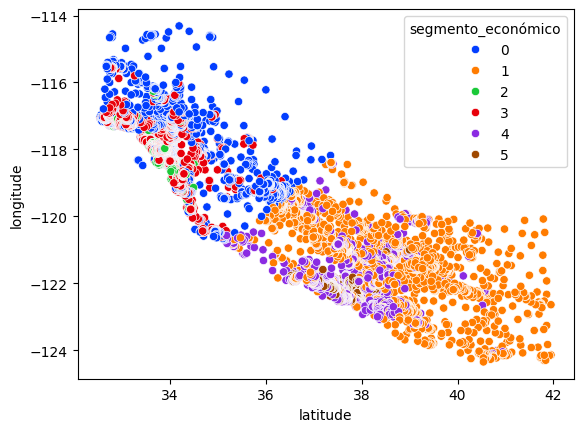

In [27]:
import seaborn as sb
sb.scatterplot(x='latitude', y ='longitude', data= X, hue='segmento_económico', palette='bright')

Para ver las cantidades de cada grupo pordemos hacer este gráfico para verlos más claro:

/var/folders/pq/6k_3wzm15kld8xrgc3fg08wc0000gn/T/ipykernel_1972/361485184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='segmento_económico',data=X, palette='bright')


<Axes: xlabel='segmento_económico', ylabel='count'>

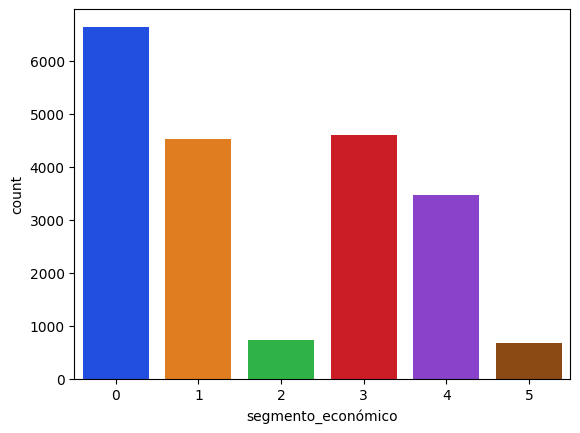

In [29]:
sb.countplot(x='segmento_económico',data=X, palette='bright')

Con esta función, agrupa cada segmento y calcula la media de los ingresos de cada uno de estos:

In [30]:
X.groupby(['segmento_económico'])['median_income'].mean()

segmento_económico
0    2.642492
1    2.509524
2    9.025869
3    4.948164
4    4.629773
5    8.265194
Name: median_income, dtype: float64

En este caso, el que más gana es el grupo 2 y el grupo 1 es el que menos ganan. Entonces, para lanzar una campaña podemos lanzar a cada grupo o varios campañas con características específicas según su poder adquisitivo.